# Analysis of Diamonds DataSet

Content
price--> price in US dollars (range is between \\$326 and \\$18,823)

carat--> weight of the diamond (range is between 0.2 and 5.01)

cut--> quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color--> diamond colour, from J (worst) to D (best)

clarity--> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x--> length in mm (range is between 0 and 10.74)

y--> width in mm (range is between 0 and 58.9)

z--> depth in mm (range is between 0 and 31.8)

depth--> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (range is between 43 and 79)

table--> width of top of diamond relative to widest point (range is between 43-95)

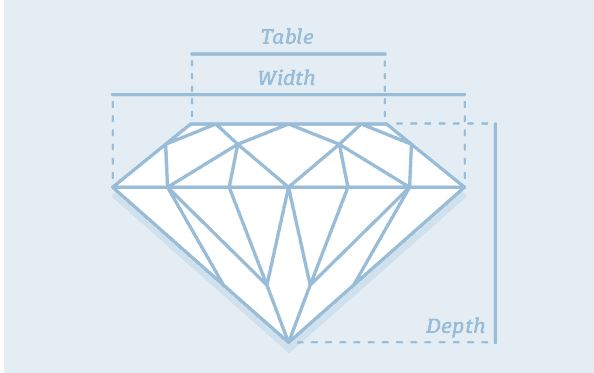

In [1]:
#including all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe and showing the size of the file and showing the first 5 rows of the data
originaldata = pd.read_csv(r'diamonds.csv')
print(originaldata.shape)
originaldata.head()

(53940, 10)


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [3]:
# Taking only the columns with numeric data and put into a dataframe
newdata = originaldata.drop(['cut', 'color', 'clarity'], axis=1)
print(newdata.shape)
newdata.head()

(53940, 7)


carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [4]:
# Finding and showing the zero values in x, y, z and removing them from your df (low outliers are x<3.5 or y<3.5 or z<2)
# Remove these entries from the dataframe
zerosdf=newdata[(newdata['x']==0.0) | (newdata['y']==0.0) | (newdata['z']==0.0)]
print(zerosdf.shape)
zerosdf.head()

(20, 7)


carat  depth  table  price     x     y    z
2207    1.00   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50   64.0   61.0   4731  7.15  7.04  0.0

In [5]:
lowdf=newdata[(newdata['x']<3.5) | (newdata['y']<3.5) | (newdata['z']<2)]
print(lowdf.shape)
lowdf.head()

(23, 7)


carat  depth  table  price     x     y    z
2207    1.00   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50   64.0   61.0   4731  7.15  7.04  0.0

In [6]:
newdf=newdata.drop(newdata[(newdata['x']<3.5) | (newdata['y']<3.5) | (newdata['z']<2)].index)

print(newdf.shape)
newdf.head()

(53917, 7)


carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [7]:
# Finding and showing high outliers, and removing them from the df ( high outliers are y>10 or z>6)
# Removing these entries from the dataframe
highdf=newdf[(newdf['y']>10) | (newdf['z']>6)]
print(highdf.shape)
newdf=newdf.drop(newdf[(newdf['y']>10) | (newdf['z']>6)].index)

print(newdf.shape)
newdf.head()

(15, 7)
(53902, 7)


carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [8]:
# Finding and showing the points of which depth values do not match x, y, and z values, and removing them from the df
# (incorrect depth the ones which satify; abs[2 * z / (x + y)) - depth]  > 0.1 )
# Removing these entries from the dataframe
checkdepthdf=newdf[(abs((2*(newdf['z'])/(newdf['x']+newdf['y'])-(newdf['depth']/100)))>0.1)]
print(checkdepthdf.shape)
checkdepthdf.head()

(12, 7)


carat  depth  table  price     x     y     z
2941    1.00   62.8   63.0   3293  6.26  6.19  3.19
4518    1.00   43.0   59.0   3634  6.32  6.27  3.97
6341    1.00   44.0   53.0   4032  6.31  6.24  4.12
10377   1.09   43.0   54.0   4778  6.53  6.55  4.12
19502   1.57   67.3   66.0   8133  7.85  5.75  3.87

In [9]:
subnewdf=newdf.drop(newdf[(abs((2*(newdf['z'])/(newdf['x']+newdf['y'])-(newdf['depth']/100)))>0.1)].index)
print(subnewdf.shape)
subnewdf.head()

(53890, 7)


carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [10]:
subnewdf.describe()

carat         depth         table         price             x  \
count  53890.000000  53890.000000  53890.000000  53890.000000  53890.000000   
mean       0.796949     61.750141     57.456630   3927.742364      5.730572   
std        0.471574      1.424849      2.233374   3983.177211      1.117882   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2400.000000      5.700000   
75%        1.040000     62.500000     59.000000   5319.750000      6.540000   
max        3.240000     79.000000     95.000000  18823.000000      9.540000   

                  y             z  
count  53890.000000  53890.000000  
mean       5.732465      3.538856  
std        1.109851      0.690170  
min        3.680000      2.240000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max        9.460000      5.980000

### Observation:

There were 53940 samples in the original data. After removing all the outliers and non matching depth values, we are left with 53890  samples.

### Correlation and Heatmaps

In [11]:
# Finding and showing the correlation matrix
subnewdf.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.026627  0.182157  0.922550  0.978665  0.977782  0.977767
depth  0.026627  1.000000 -0.298133 -0.011755 -0.026063 -0.029184  0.096291
table  0.182157 -0.298133  1.000000  0.127206  0.196261  0.190266  0.156072
price  0.922550 -0.011755  0.127206  1.000000  0.887142  0.888739  0.882514
x      0.978665 -0.026063  0.196261  0.887142  1.000000  0.998735  0.991914
y      0.977782 -0.029184  0.190266  0.888739  0.998735  1.000000  0.991474
z      0.977767  0.096291  0.156072  0.882514  0.991914  0.991474  1.000000

In [12]:
# Using seaborn heatmap to see the correlations
subnewdf.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

### Observation:

Carat has the highest correlation with the price. As we can see from the above heatmap, the price has the best correlation with carat, x, y, z. This means that the price of the diamond increases if the carat, x, y or z values increase. The price value does not change a lot if depth and table values increase because the correlation value is not high.

### PCA Analysis

In [13]:
# Creating a PCA object and calculate the principal components and showing them.
# Also transforming the data using PCA
scaled_data = preprocessing.scale(subnewdf)
print(scaled_data)

[[-1.2022596  -0.17555779 -1.09997402 ... -1.59282332 -1.57902493
  -1.60665812]
 [-1.24467116 -1.36867773  1.5865696  ... -1.64649674 -1.70516922
  -1.78053006]
 [-1.2022596  -3.40399997  3.37759868 ... -1.50336762 -1.49793218
  -1.78053006]
 ...
 [-0.20558787  0.73682804  1.13881233 ... -0.06313092 -0.04727292
   0.03063596]
 [ 0.13370464 -0.52647542  0.24329779 ...  0.37520199  0.34918054
   0.29144387]
 [-0.09955896  0.31572689 -1.09997402 ...  0.08894376  0.12392289
   0.14655059]]


In [14]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
print(pca.components_)

[[ 4.50463967e-01 -1.09764867e-03  9.91179280e-02  4.23253229e-01
   4.50934266e-01  4.50828840e-01  4.48915353e-01]
 [-3.46887810e-02 -7.30775768e-01  6.75126680e-01 -3.56575709e-02
   3.28060303e-03  1.91754939e-03 -8.76443353e-02]
 [-7.09182563e-03  6.73002844e-01  7.27874869e-01 -1.07786058e-01
  -3.98538531e-02 -4.95264566e-02  3.94464202e-02]
 [ 1.37430679e-02  4.80525487e-02  6.47106388e-02  8.69097135e-01
  -2.86395561e-01 -2.80422761e-01 -2.78074526e-01]
 [ 8.91490585e-01 -2.44348594e-02 -1.91736543e-02 -2.29100353e-01
  -2.05404980e-01 -2.50236311e-01 -2.16756675e-01]
 [-2.83996548e-02 -5.44647444e-03 -4.76167174e-03  1.17703288e-02
   7.02685442e-01 -7.10325671e-01  2.59459486e-02]
 [-8.81664619e-03 -1.00483683e-01 -9.16294789e-05  3.47362417e-03
  -4.20807250e-01 -3.85329877e-01  8.15018629e-01]]


### Observation:

7 principal components will be calculated if you don't specify the component number because there are 7 columns in the data that is used for principal component analysis. The information in these 7 columns is transformed into principal components and the first few principal components can explain a sizeable chunk of the total information (variance).

In [15]:
# Showing the variance and the variance ratios in %
print(pca.explained_variance_)

[4.83959465e+00 1.28788600e+00 6.88509444e-01 1.61942945e-01
 2.05884409e-02 1.21012689e-03 3.98283406e-04]


In [16]:
print(pca.explained_variance_ratio_,"\n")
print(np.round(pca.explained_variance_ratio_ * 100, decimals=1))

[6.91357836e-01 1.83980300e-01 9.83566669e-02 2.31342772e-02
 2.94115127e-03 1.72872063e-04 5.68965736e-05] 

[69.1 18.4  9.8  2.3  0.3  0.   0. ]


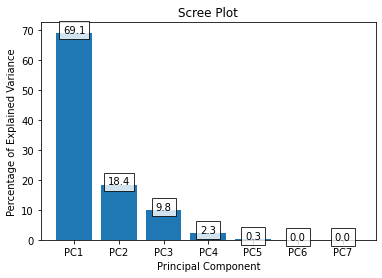

In [17]:
# Plotting the variace ratios as a bar graph
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
for i in range(len(per_var)):
    plt.text(i+1,per_var[i],per_var[i], ha = 'center',bbox = dict(facecolor = 'white', alpha =0.8))

plt.show()

### Observation:

As a good data visualizer expert, the number of principal components that should be used to transform this data without loosing much information is to add the principle components so that the principle component varience ratio should be more than or equal to 95%. In this case, I used 3 PC values, they are PC1, PC2, PC3. They add up to 97.3% (69.1% + 18.4% + 9.8%) which is greater than 95%

In [18]:
# Creating a new dataframe using the new data set pca_data
pca_df = pd.DataFrame(pca_data, columns=['newf1','newf2','newf3','newf4','newf5','newf6','newf7'])
print(pca_df)

          newf1     newf2     newf3     newf4     newf5     newf6     newf7
0     -3.184517 -0.407819 -0.734496  0.463726  0.231298 -0.009624 -0.005539
1     -3.095154  2.294133  0.419827  0.678753  0.251409  0.032663  0.043962
2     -2.738215  4.990056  0.337399  0.598545  0.223296 -0.012612  0.107858
3     -2.661414  0.008746  0.658584  0.376697  0.137959 -0.018389 -0.014973
4     -2.459623 -0.468951  1.079872  0.293313  0.069808 -0.007320 -0.031473
...         ...       ...       ...       ...       ...       ...       ...
53885 -0.223695  0.370456 -0.568912 -0.299245 -0.055492 -0.001091  0.004685
53886 -0.270945 -1.427926 -0.125487 -0.306048 -0.099033 -0.032799 -0.001478
53887 -0.140973  0.245016  1.364005 -0.126357 -0.137625 -0.017044 -0.003601
53888  0.417963  0.531192 -0.167247 -0.549583 -0.032884  0.017631 -0.004225
53889 -0.116861 -0.971728 -0.559673 -0.413802 -0.089087 -0.018838  0.002494

[53890 rows x 7 columns]


<IPython.core.display.Javascript object>


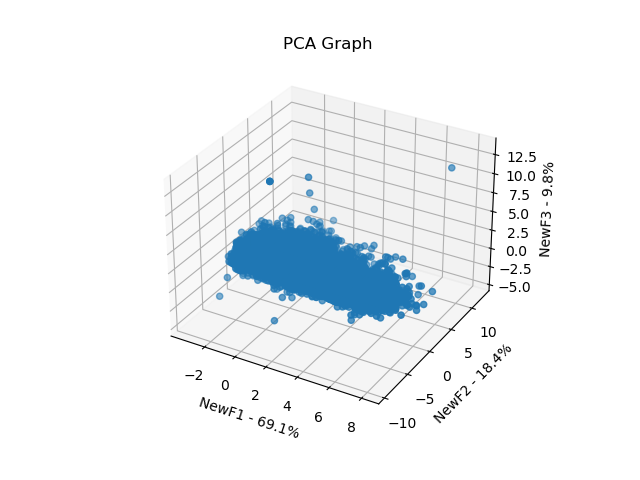

PC1 - 69.1% , PC2 - 18.4% , PC3 - 9.8% , PC4 - 2.3% , PC5 - 0.3% , PC6 - 0.0% , PC7 - 0.0%

We add PC1, PC2 and PC3 to get 97.3% to get the ratio more than 95%


In [60]:
# Drawing the figure
%matplotlib notebook
figure1 = plt.figure()
axis1 = figure1.add_subplot( projection='3d')

axis1.scatter(pca_df.newf1, pca_df.newf2,pca_df.newf3)
plt.title('PCA Graph')
axis1.set_xlabel('NewF1 - {0}%'.format(per_var[0]))
axis1.set_ylabel('NewF2 - {0}%'.format(per_var[1]))
axis1.set_zlabel('NewF3 - {0}%'.format(per_var[2]))

plt.show()

print('PC1 - {0}%'.format(per_var[0]),', PC2 - {0}%'.format(per_var[1]),', PC3 - {0}%'.format(per_var[2]),', PC4 - {0}%'.format(per_var[3]),', PC5 - {0}%'.format(per_var[4]),', PC6 - {0}%'.format(per_var[5]),', PC7 - {0}%'.format(per_var[6]))
print("\nWe add PC1, PC2 and PC3 to get {0}% to get the ratio more than 95%".format(per_var[0]+per_var[1]+per_var[2]))

In [20]:
# Showing the most important PC and showing the column which has the highest affect on the variance
loading_features = pd.Series(pca.components_[0], index=newdata.columns)
sorted_features = loading_features.abs().sort_values(ascending=False)

top_features = sorted_features[0:10].index.values
print(loading_features[top_features])

x        0.450934
y        0.450829
carat    0.450464
z        0.448915
price    0.423253
table    0.099118
depth   -0.001098
dtype: float64


### Observation:

The features that have the highest effect on the variance and the features that are responsible for the differences between diamonds the most are x, y, carat, z. But, The feature that have the highest effect on the variance and the feature that is responsible for the differences between diamonds the most is x.

### Finding and showing the realtion between the color and price

In [21]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [22]:
pip install init_notebook_mode

ERROR: Could not find a version that satisfies the requirement init_notebook_mode (from versions: none)
ERROR: No matching distribution found for init_notebook_mode

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
init_notebook_mode(connected=True)

In [24]:
import cufflinks as cf
cf.go_offline()

In [25]:
print(originaldata.shape)
Q6df=originaldata.drop(originaldata[(originaldata['x']<3.5) | (originaldata['y']<3.5) | (originaldata['z']<2)].index)

print(Q6df.shape)
Q6df=Q6df.drop(Q6df[(Q6df['y']>10) | (Q6df['z']>6)].index)

print(Q6df.shape)
Q6df=Q6df.drop(Q6df[(abs((2*(Q6df['z'])/(Q6df['x']+Q6df['y'])-(Q6df['depth']/100)))>0.1)].index)
print(Q6df.shape)
Q6df.head()

(53940, 10)
(53917, 10)
(53902, 10)
(53890, 10)


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

#### Removing the outliers from the diamonds data

In [26]:
%matplotlib inline

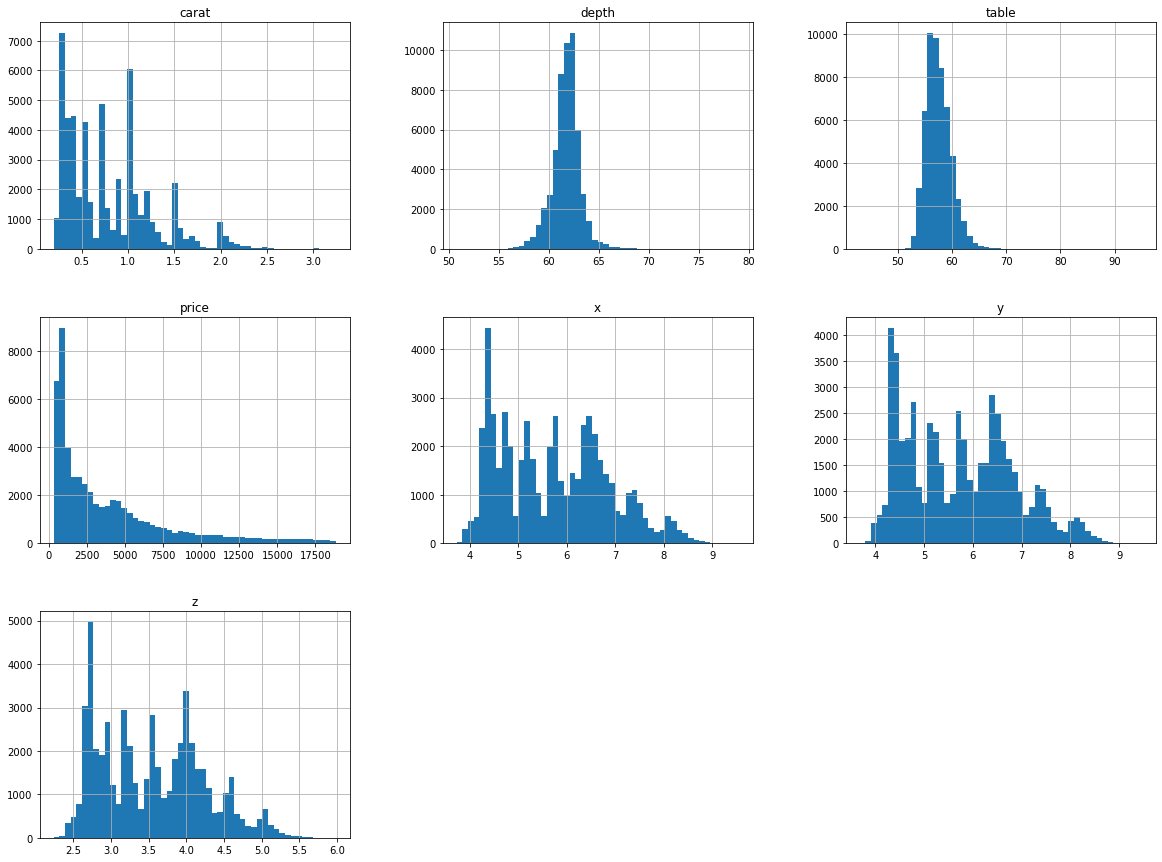

In [27]:
Q6df.hist(bins=50,figsize=(20,15))
plt.show()

#### Histogram showing the frequency of data occuring at each value.

In [28]:
Q6df.iplot(kind='scatter', x= 'color', y= 'price', mode= 'markers')

In [29]:
plt.rcParams["figure.figsize"] = [12,8]

<AxesSubplot:xlabel='color', ylabel='price'>

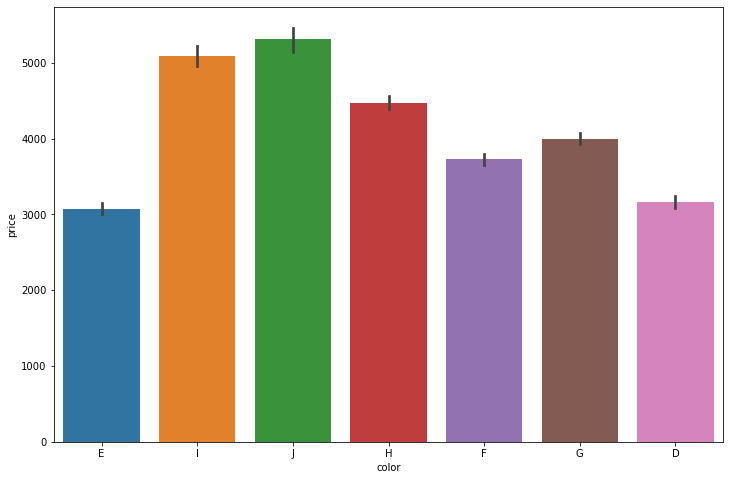

In [30]:
sns.barplot(x='color', y='price', data=Q6df)

<AxesSubplot:xlabel='color', ylabel='price'>

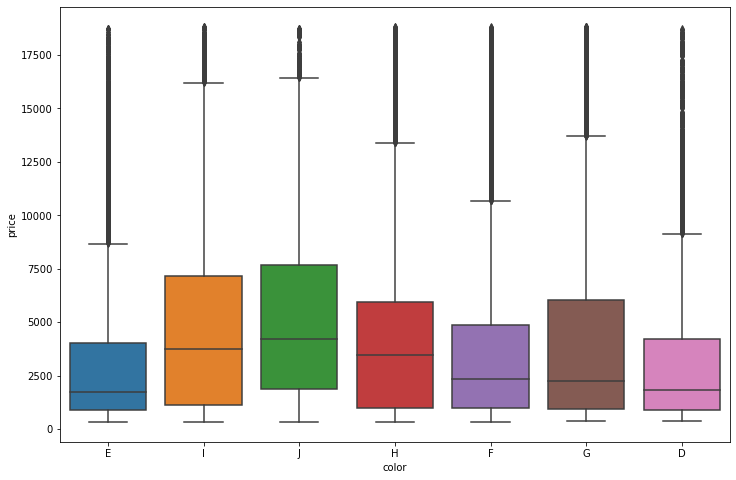

In [31]:
sns.boxplot(x='color', y='price', data=Q6df)

<AxesSubplot:xlabel='color', ylabel='x'>

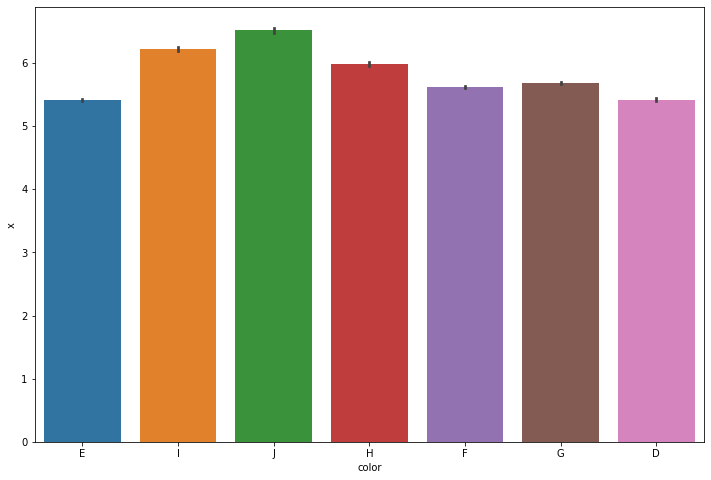

In [32]:
sns.barplot(x='color', y='x', data=Q6df)

<AxesSubplot:xlabel='color', ylabel='y'>

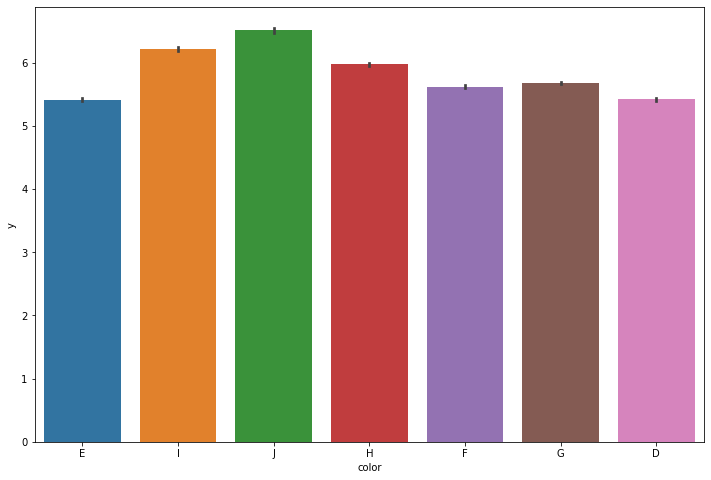

In [33]:
sns.barplot(x='color', y='y', data=Q6df)

<AxesSubplot:xlabel='color', ylabel='z'>

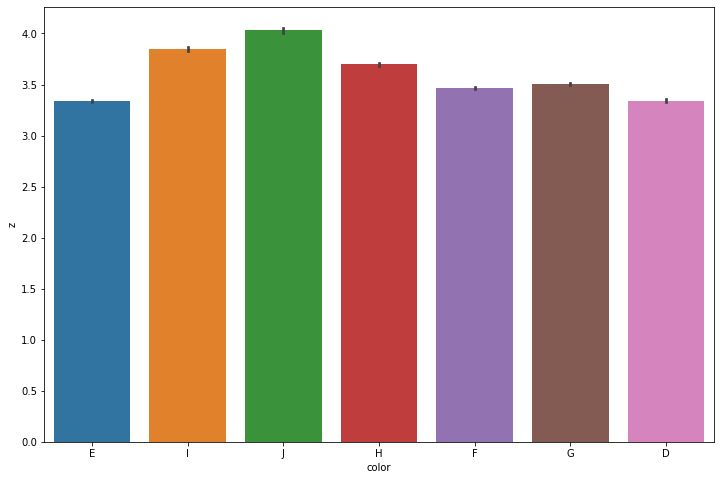

In [34]:
sns.barplot(x='color', y='z', data=Q6df)

<AxesSubplot:xlabel='color', ylabel='carat'>

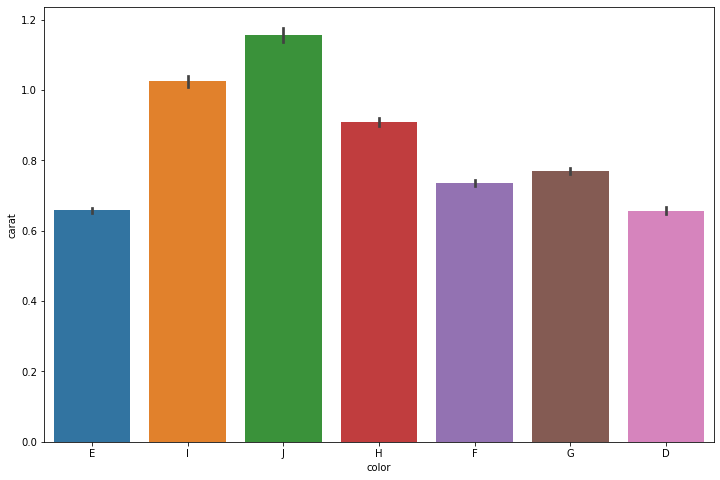

In [35]:
sns.barplot(x='color', y='carat', data=Q6df)

#### From the graph price vs color,  diamond of color J has the highest average cost and the color E has the lowest average cost of all the different colors of diamonds. Even though J is the worst color of diamonds its average cost is high because the average x, y, z and carat values are high. This is justified when we look at the color vs x, color vs y, color vs z and color vs carat graphs. Even in these 4 graphs the Highest average is J and the lowest is E. This proves that the relation between color and price depends on the x, y, z and carat values.

<AxesSubplot:xlabel='cut', ylabel='price'>

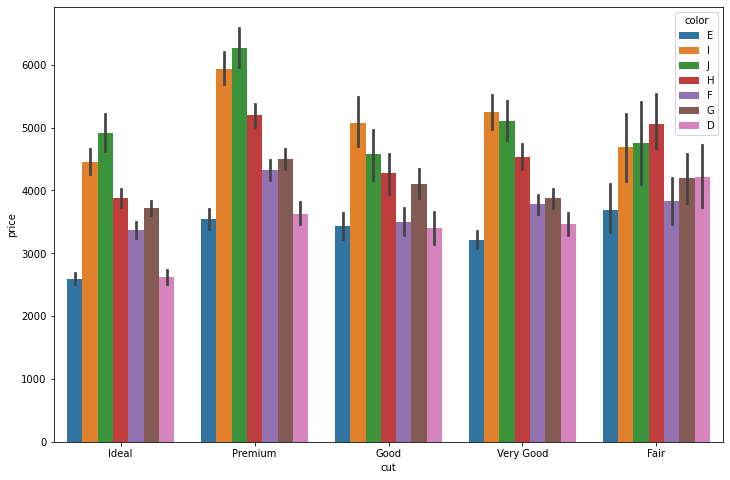

In [36]:
sns.barplot(x='cut', y='price', data=Q6df,hue='color')

<AxesSubplot:xlabel='cut', ylabel='price'>

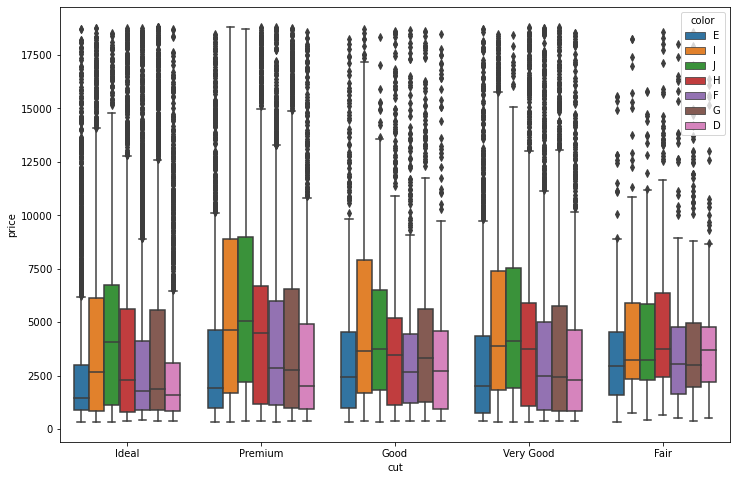

In [37]:
sns.boxplot(x='cut', y='price', data=Q6df,hue='color')

<AxesSubplot:xlabel='cut', ylabel='count'>

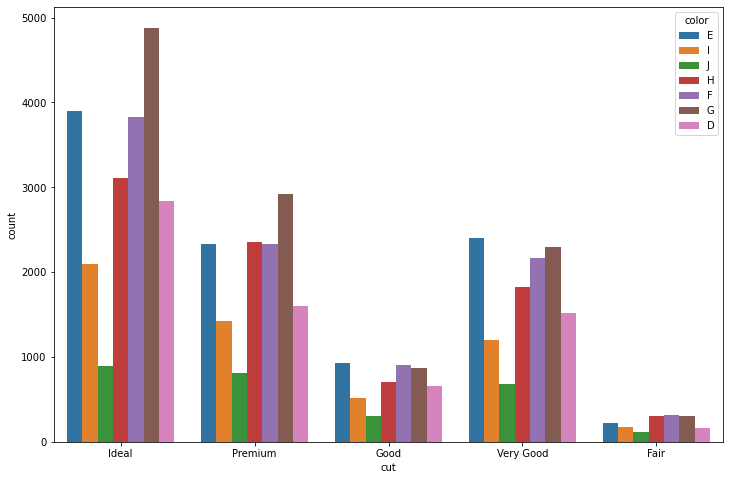

In [38]:
sns.countplot(x='cut', data=Q6df,hue='color')

<AxesSubplot:xlabel='clarity', ylabel='price'>

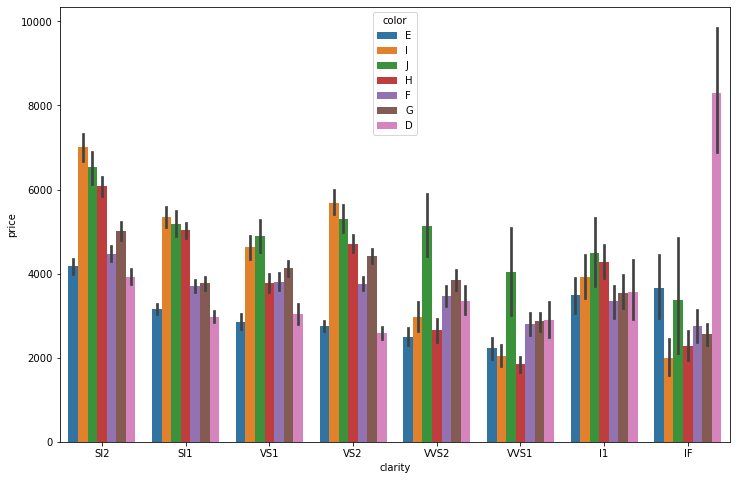

In [39]:
sns.barplot(x='clarity', y='price', data=Q6df,hue='color')

<AxesSubplot:xlabel='clarity', ylabel='price'>

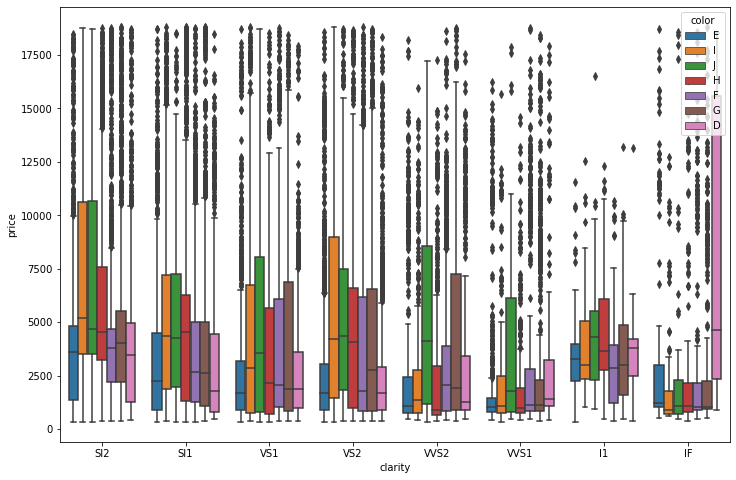

In [40]:
sns.boxplot(x='clarity', y='price', data=Q6df,hue='color')

<AxesSubplot:xlabel='clarity', ylabel='count'>

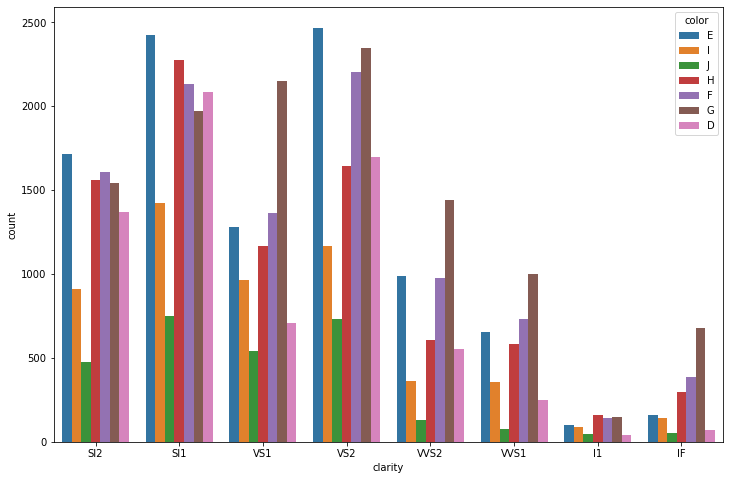

In [41]:
sns.countplot(x='clarity', data=Q6df,hue='color')

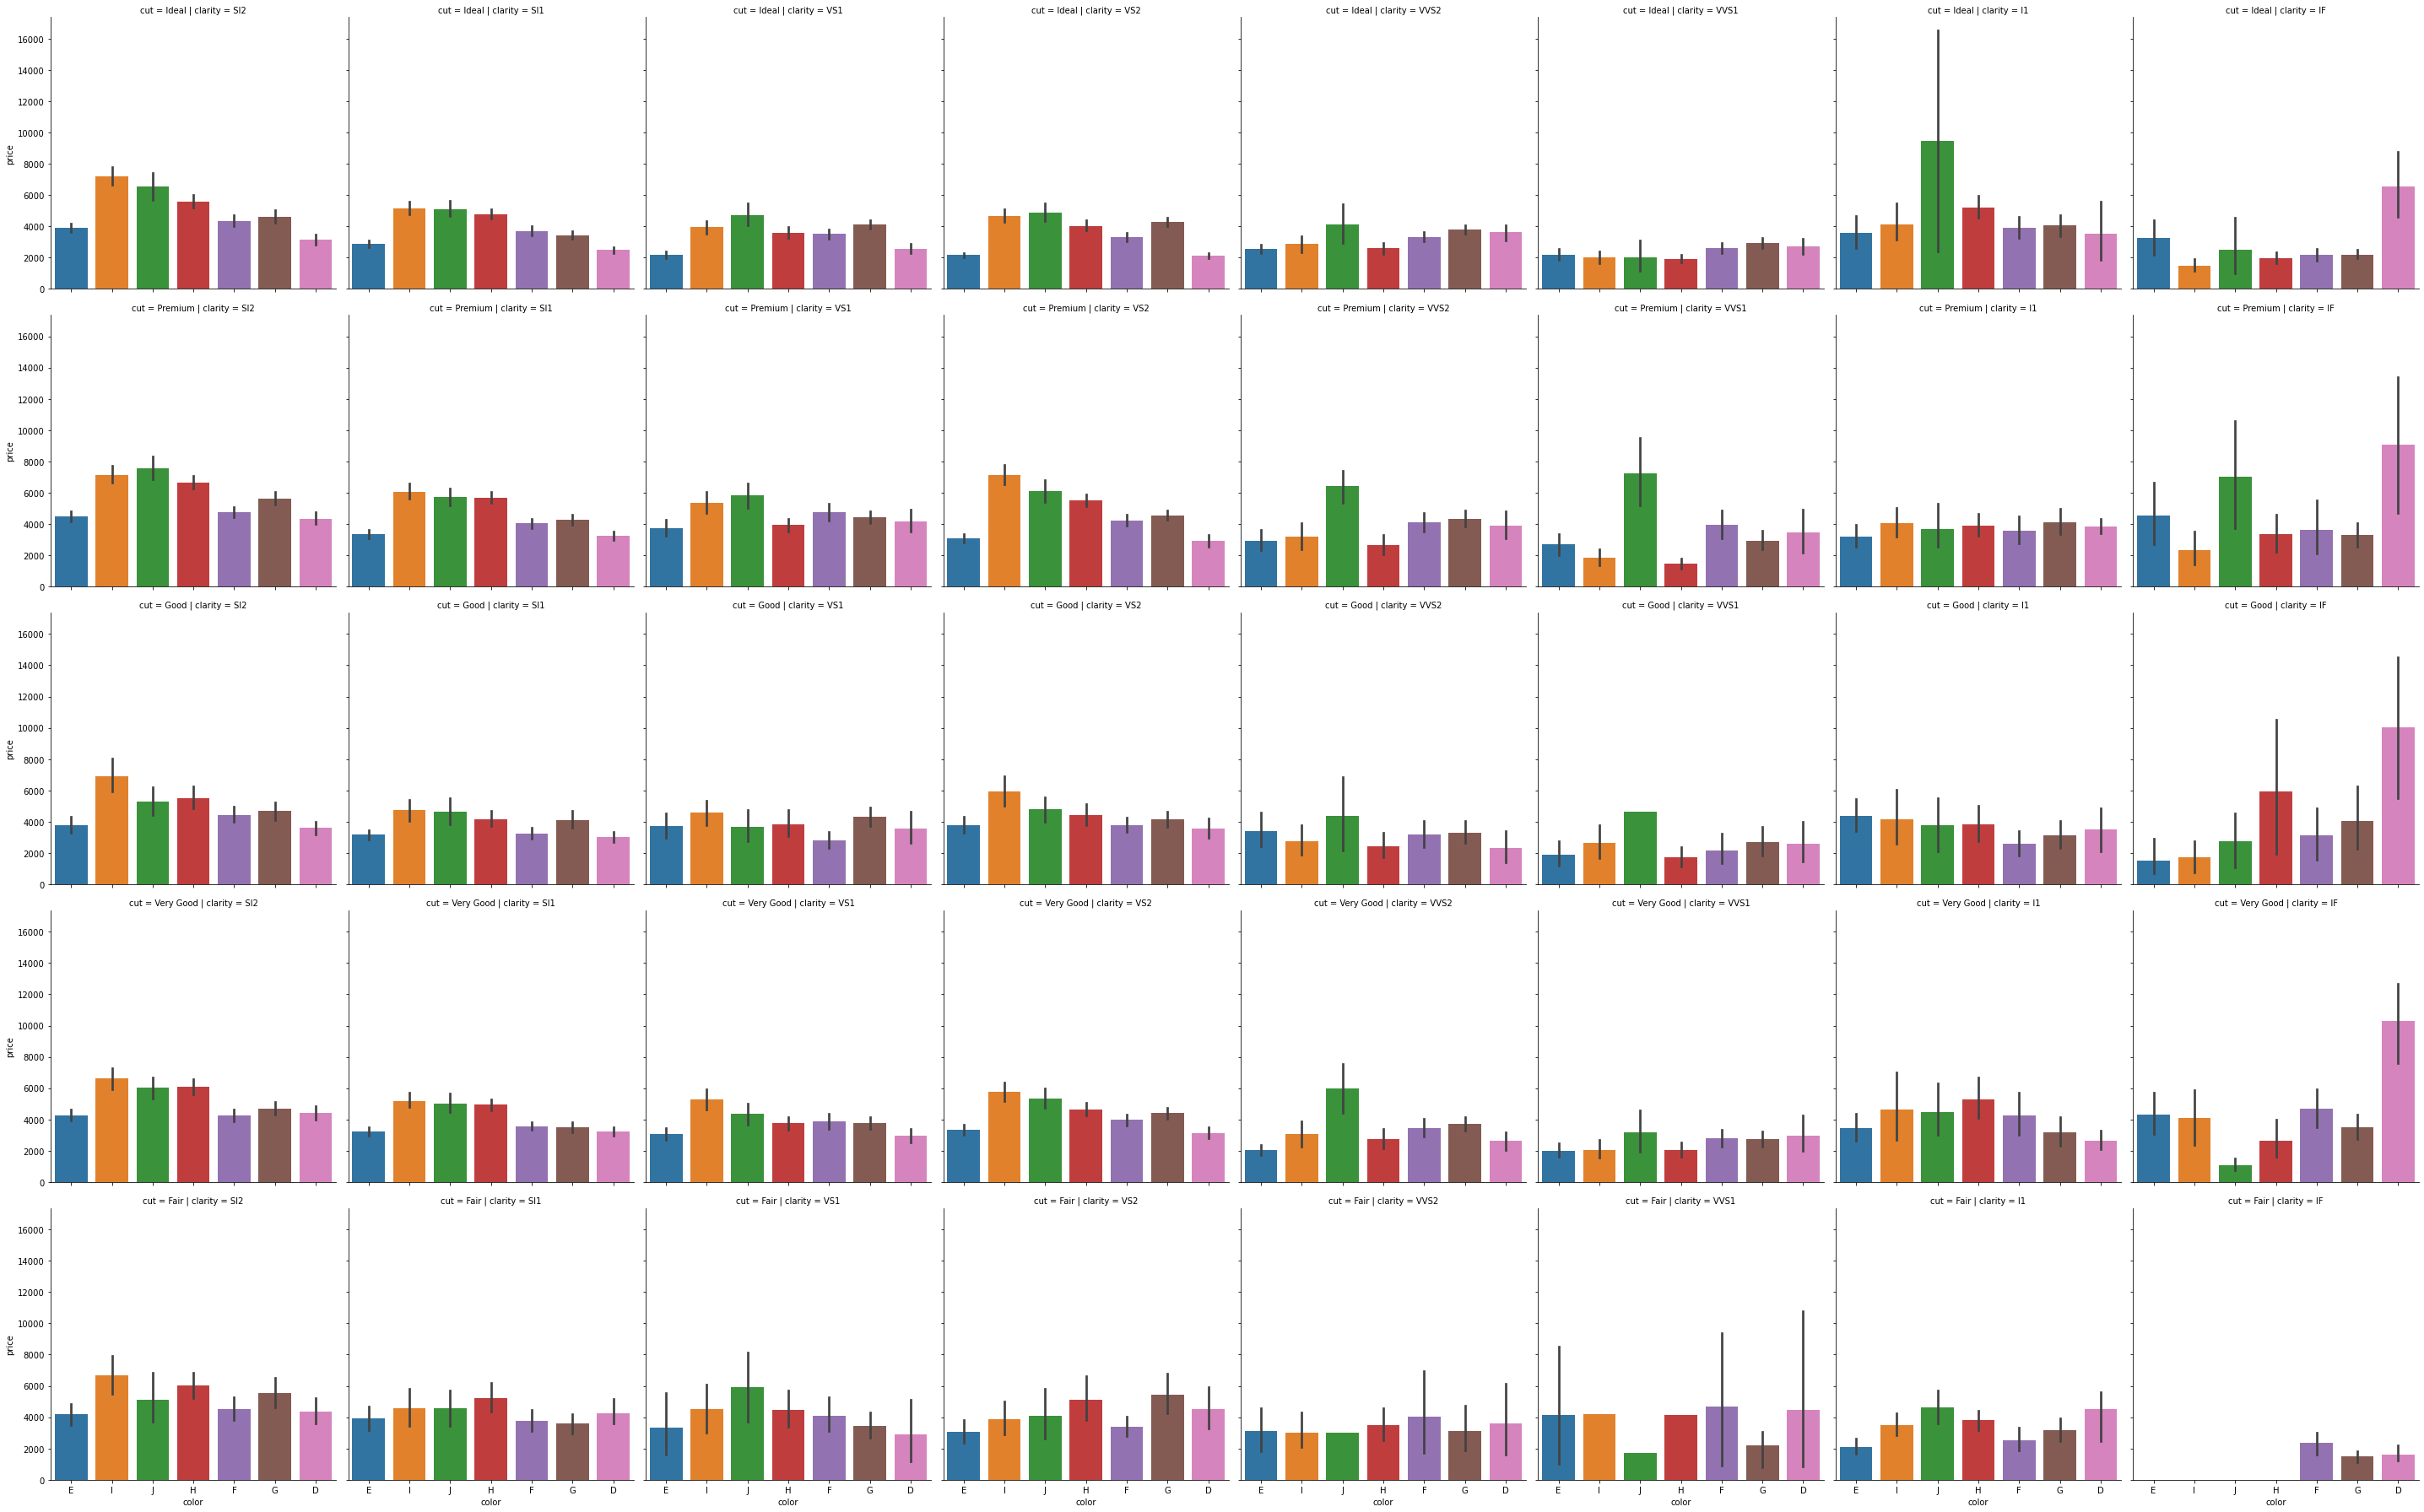

In [42]:
sns.catplot(x="color", y="price", col="clarity", row='cut', data=Q6df, kind="bar");
#it zooms in if you double click the below graph

#### In the above graphs I tried to observe the relation between color and price, with relation to the change in cut and clarity of the diamond. From the price vs cut graph we can see that there isn't a drastic effect on the price of the diamonds based on the cut of the diamonds because in most of the cuts the color J has the higher average price and as we have stated above the x, y, z, and carat values influence the price of the diamonds. 

#### Similar to cut, the clarity of the diamond does not drastically influence the price of the diamonds because the hierarchy of average price of each color does not change that much. This proves that the cut and clarity do not drastically influence the relation between color and price

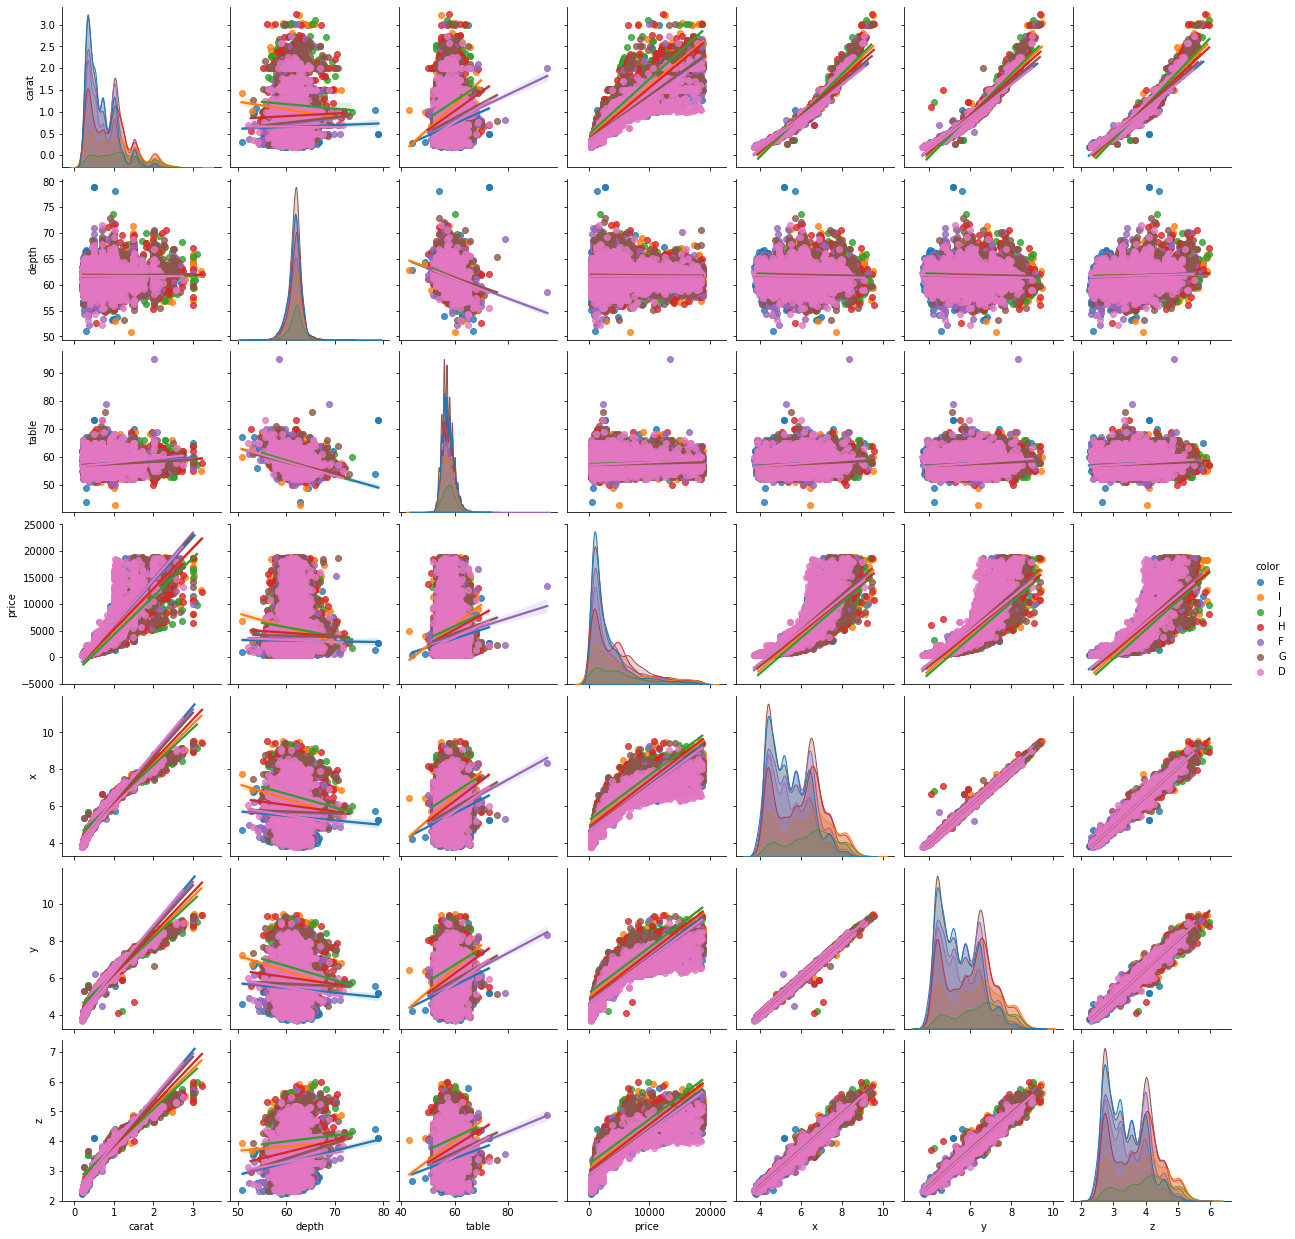

In [43]:
sns.pairplot( data=Q6df,kind = 'reg',hue='color')

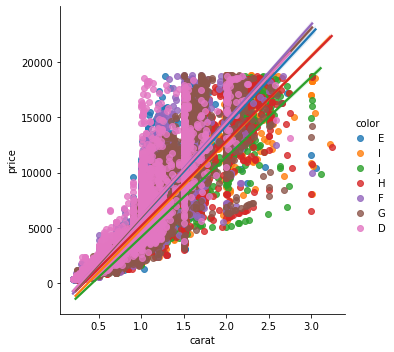

In [44]:
sns.lmplot(x='carat', y='price', data=Q6df, fit_reg=True,hue='color')

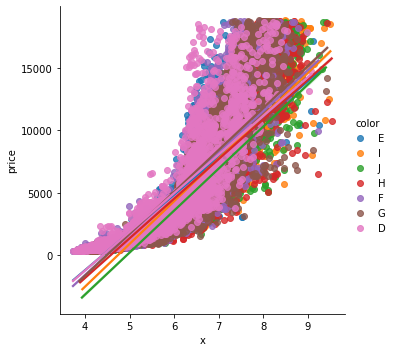

In [45]:
sns.lmplot(x='x', y='price', data=Q6df, fit_reg=True,hue='color')

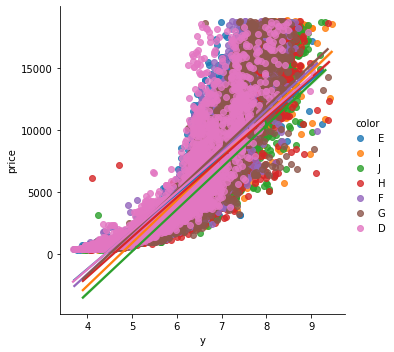

In [46]:
sns.lmplot(x='y', y='price', data=Q6df, fit_reg=True,hue='color')

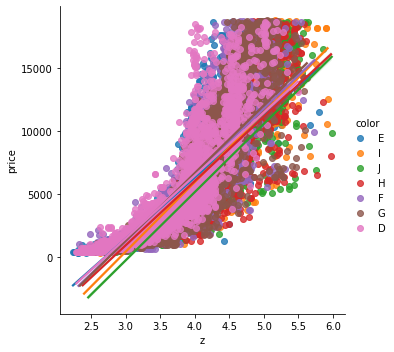

In [47]:
sns.lmplot(x='z', y='price', data=Q6df, fit_reg=True,hue='color')

#### From the pairplot and the scatter plots we can see that the price and the features x, y, z and carat are positively correlated and as the these features increase in value the price of the diamond also increases, this is similar for all the colors of diamonds. So, the relation between the color and price is influenced by the x, y, z, and carat features. 

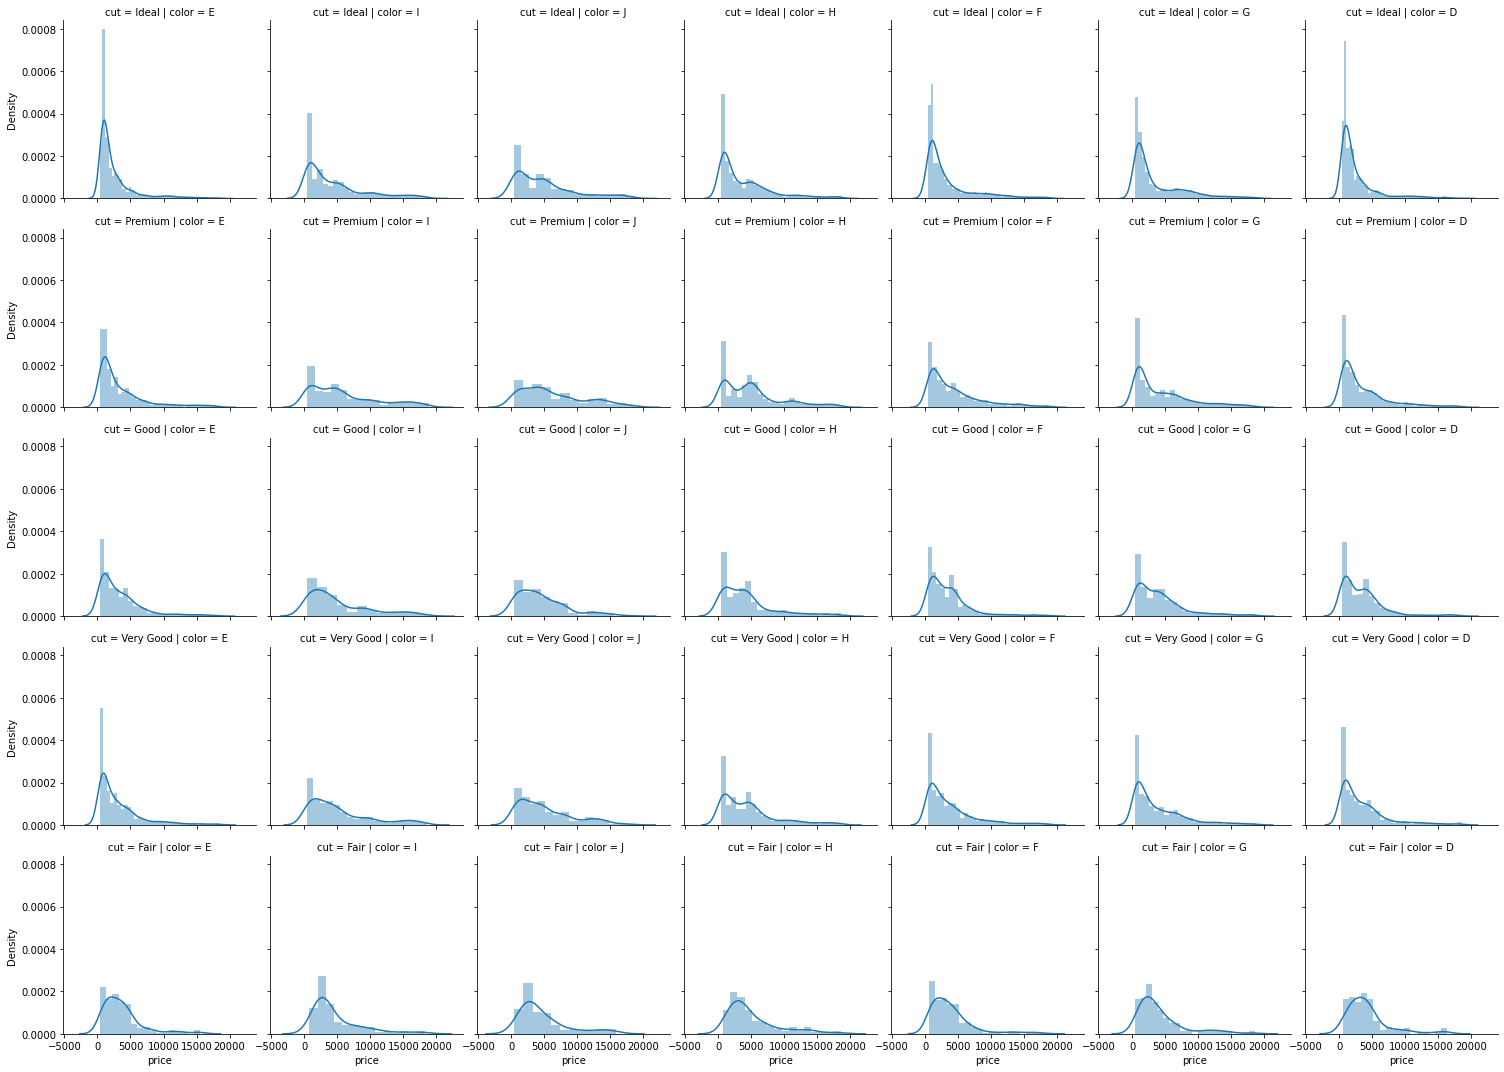

In [48]:
fgrid = sns.FacetGrid(data=Q6df, col='color', row='cut')
fgrid.map(sns.distplot, 'price')

In [49]:
Q6df.describe()

carat         depth         table         price             x  \
count  53890.000000  53890.000000  53890.000000  53890.000000  53890.000000   
mean       0.796949     61.750141     57.456630   3927.742364      5.730572   
std        0.471574      1.424849      2.233374   3983.177211      1.117882   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2400.000000      5.700000   
75%        1.040000     62.500000     59.000000   5319.750000      6.540000   
max        3.240000     79.000000     95.000000  18823.000000      9.540000   

                  y             z  
count  53890.000000  53890.000000  
mean       5.732465      3.538856  
std        1.109851      0.690170  
min        3.680000      2.240000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max        9.460000      5.980000

In [50]:
data5to6=Q6df[(Q6df['x']>=5) & (Q6df['x']<=6) & (Q6df['y']>=5) & (Q6df['y']<=6) & (Q6df['z']>=3) & (Q6df['z']<=4) & (Q6df['carat']>=0.5) & (Q6df['carat']<=1.0)]
print(data5to6.shape)

(13612, 10)


#### Filtering to get data of x between 5 to 6, y between 5 to 6, z between 3 to 4 and x between 0.5 to 1

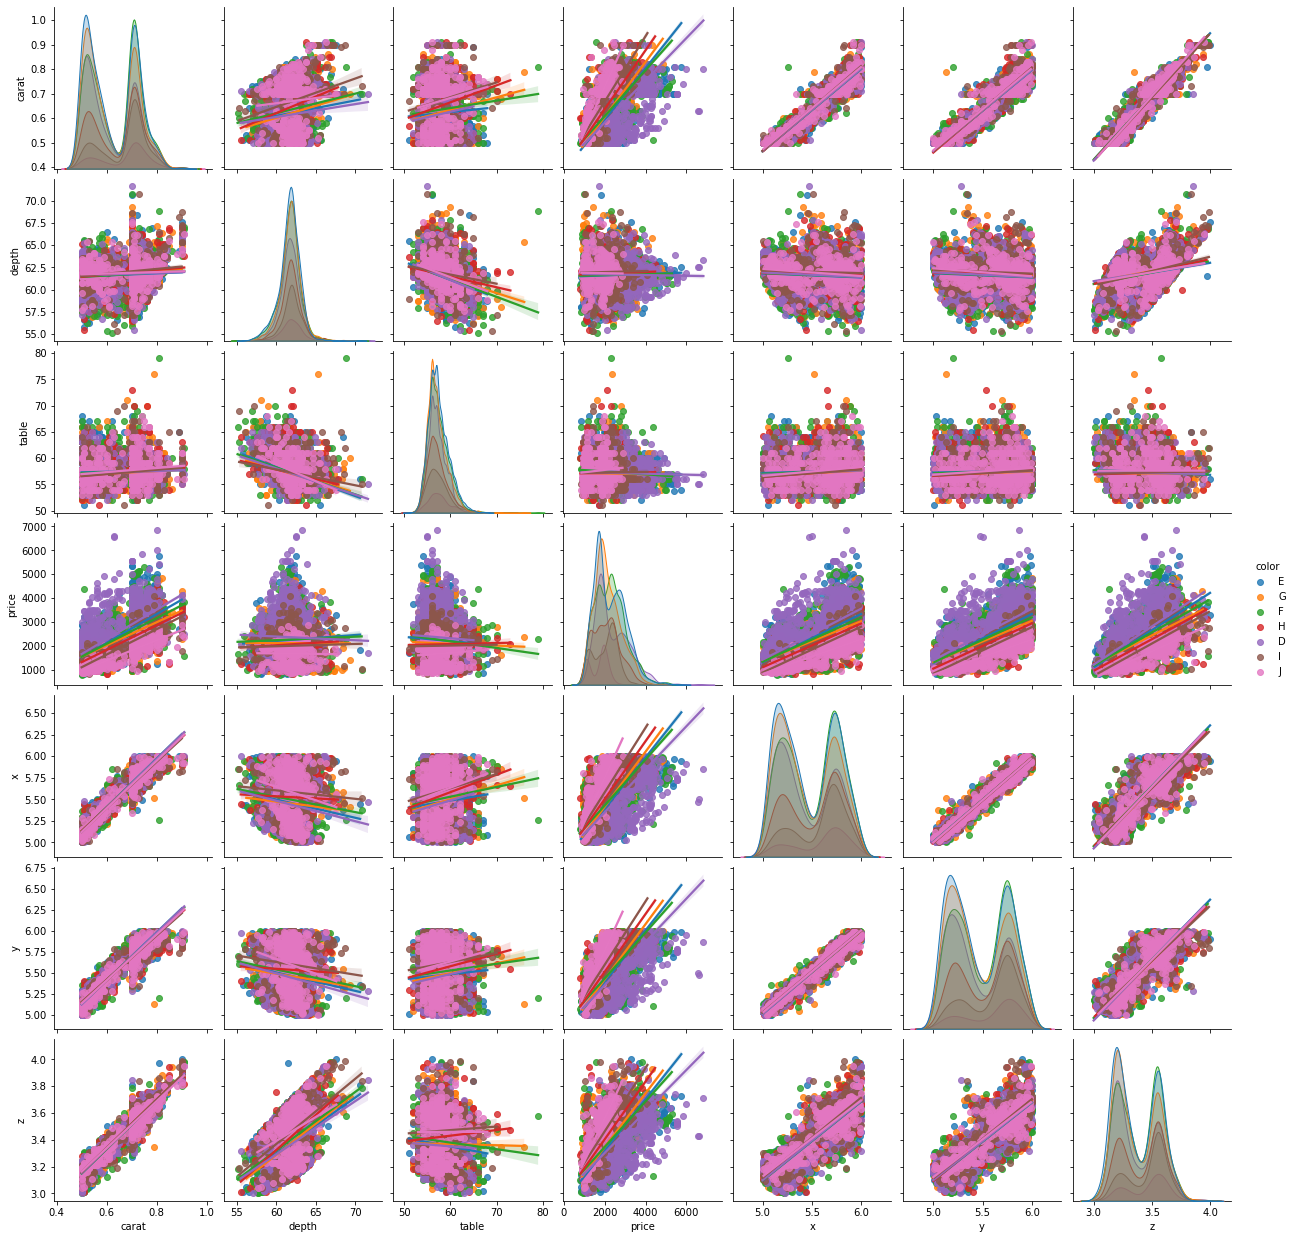

In [51]:
sns.pairplot( data=data5to6,kind = 'reg',hue='color')

<AxesSubplot:xlabel='color', ylabel='price'>

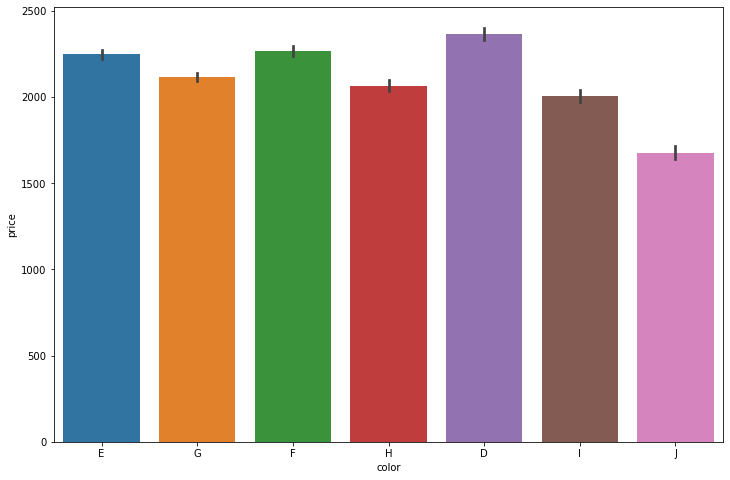

In [52]:
sns.barplot(x='color', y='price', data=data5to6)

<AxesSubplot:xlabel='cut', ylabel='price'>

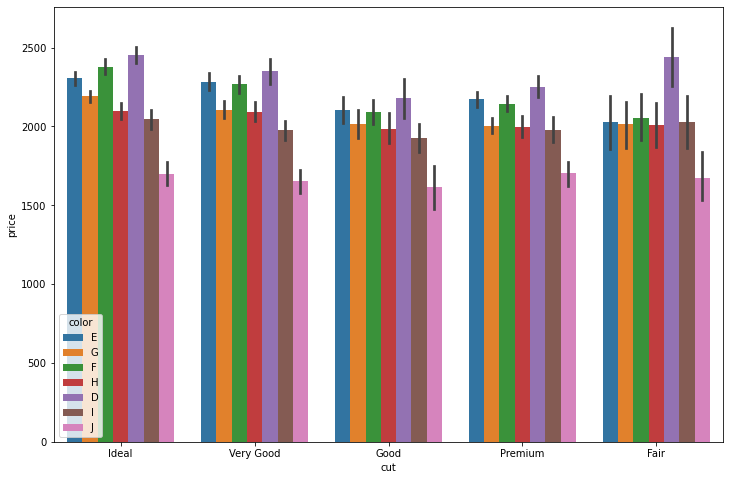

In [53]:
sns.barplot(x='cut', y='price', data=data5to6,hue='color')

<AxesSubplot:xlabel='clarity', ylabel='price'>

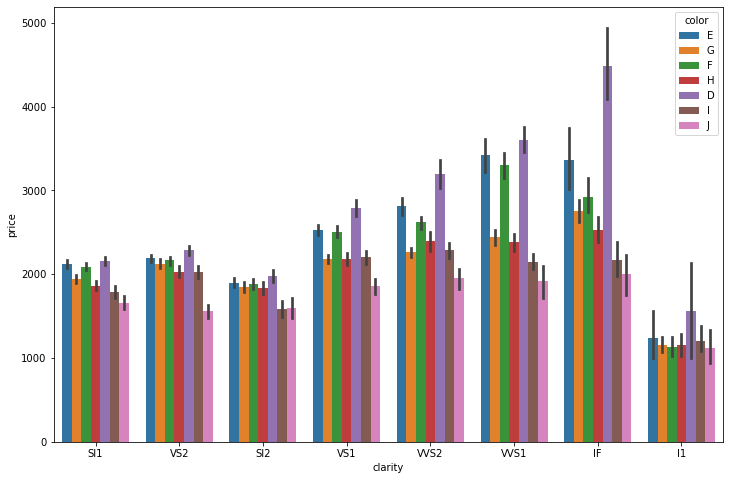

In [54]:
sns.barplot(x='clarity', y='price', data=data5to6,hue='color')

In [55]:
data7to8=Q6df[(Q6df['x']>=7) & (Q6df['x']<=8) & (Q6df['y']>=7) & (Q6df['y']<=8) & (Q6df['z']>=4) & (Q6df['z']<=5) & (Q6df['carat']>=1.0) & (Q6df['carat']<=2.0)]
print(data5to6.shape)

(13612, 10)


#### Filtering to get data of x between 7 to 8, y between 7 to 8, z between 4 to 5 and x between 1 to 2

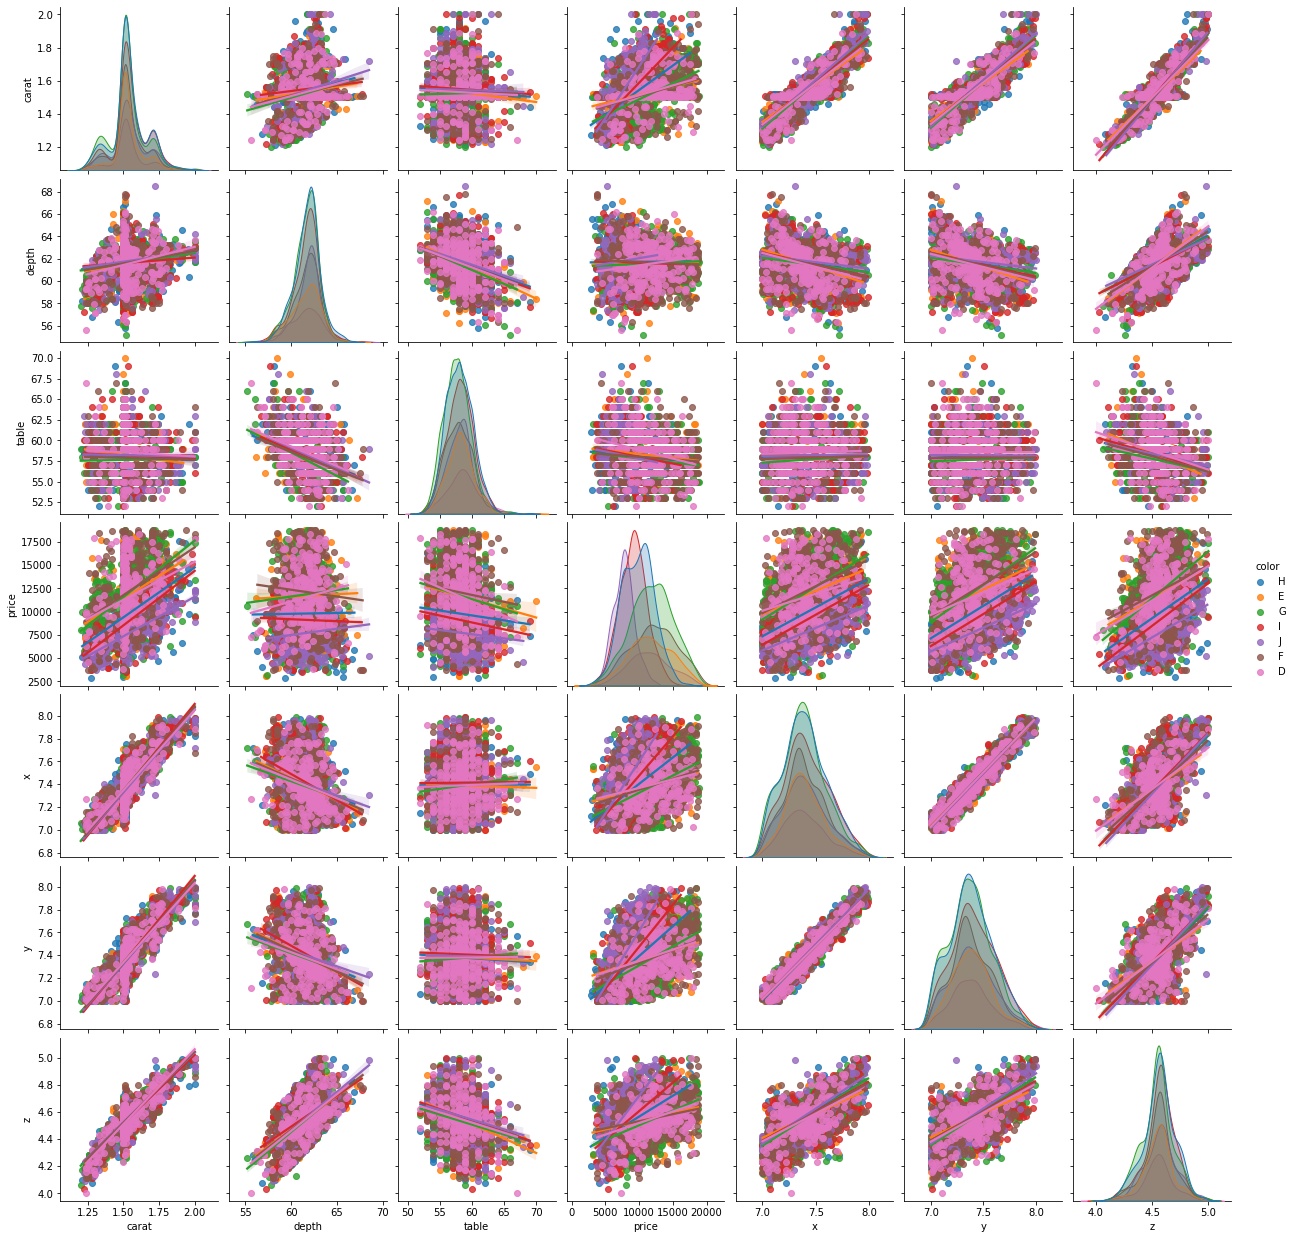

In [56]:
sns.pairplot( data=data7to8,kind = 'reg',hue='color')

<AxesSubplot:xlabel='color', ylabel='price'>

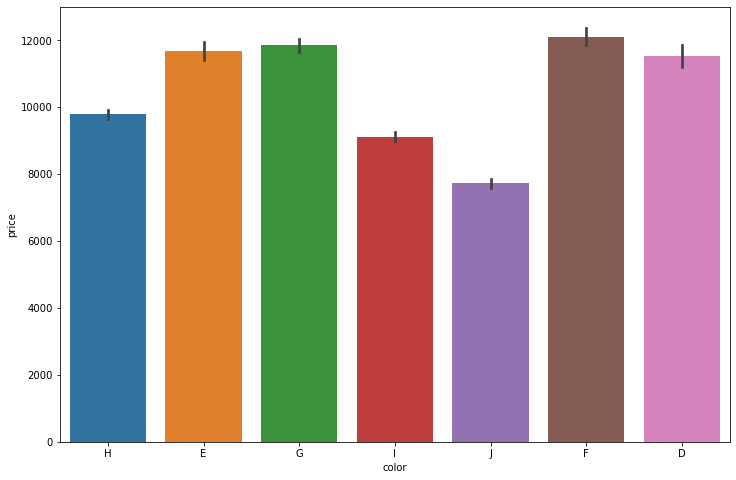

In [57]:
sns.barplot(x='color', y='price', data=data7to8)

<AxesSubplot:xlabel='cut', ylabel='price'>

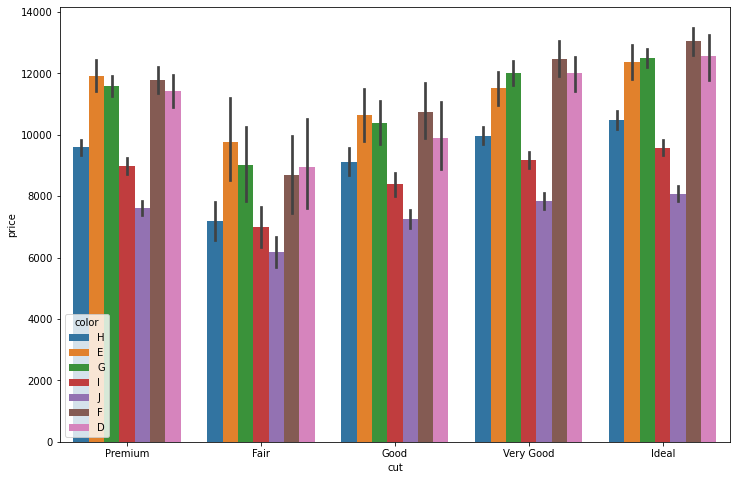

In [58]:
sns.barplot(x='cut', y='price', data=data7to8,hue='color')

<AxesSubplot:xlabel='clarity', ylabel='price'>

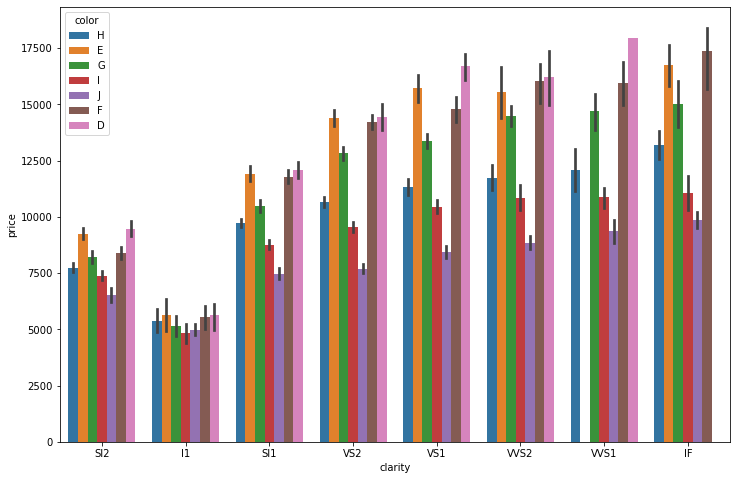

In [59]:
sns.barplot(x='clarity', y='price', data=data7to8,hue='color')

#### From the above graphs, we can see that after filtering the diamonds data for specific set of x, y, z and carat values we can observe the relationship between color and price, where the price of diamonds are in the order of worst color to best. 

#### We can also see that the price of diamonds increases as the cut of the diamonds goes from fair to ideal for each different color of the diamond. 

#### We can also see that the price of diamonds increases as the clarity of the diamonds goes from worst to best for each different color of the diamond. 

#### Hence, we can say that the features that influence the relation between color and price are x, y, z, and carat. And the price of the diamonds also changes based on the cut and clarity of the diamonds for each different color of the diamonds.